## DATA ANALYTIC PYTHON PROJECT - BLINKIT ANALYSIS

### Imports Libraries --> -->


In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 


 ### Import Raw dataset -->

In [3]:
df = pd.read_csv("BlinkIT Grocery Data.csv")
#check top 5 rows 
print(df.head())

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596     

In [7]:
# Cheeck the Size of dataset   
print("Size of dataset : ",df.shape)

Size of dataset :  (8523, 12)


In [9]:
# check columns names
print("Columns:",df.columns)

Columns: Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


In [10]:
# Check Datatyes 
print("Datatypes:", df.dtypes)

Datatypes: Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object


### modify  Item Fat Content column like LR,low fat AND reg replace Low Fat and Regular

In [15]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':"Low Fat",'low fat':"Low Fat","reg":"Regular"})

In [16]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [17]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [27]:
df.groupby(['Item Type'])['Sales'].mean().sort_values(ascending=False).round(2).head(5)

Item Type
Household                149.42
Dairy                    148.50
Starchy Foods            147.84
Snack Foods              146.19
Fruits and Vegetables    144.58
Name: Sales, dtype: float64

# Business Reguirement

# KPI'S Requirement

In [42]:
# Total Sales 
total_sale = df['Sales'].sum()
# AVG Sales 
Avg_sale = df['Sales'].mean()

# total no of item  Sales 
no_of_items = df['Item Fat Content'].count()
# avg rating
avg_rating = df['Rating'].mean()

# Display all values
print(f"Total sale : ${total_sale:.1f}")
print()
print(f"Avg_sale : ${Avg_sale:.0f}")
print()
print(f"no_of_items : {no_of_items:.0f}")
print()
print(f"avg_rating : {avg_rating:.1f}")










Total sale : $1201681.5

Avg_sale : $141

no_of_items : 8523

avg_rating : 4.0


# Charts Requirement

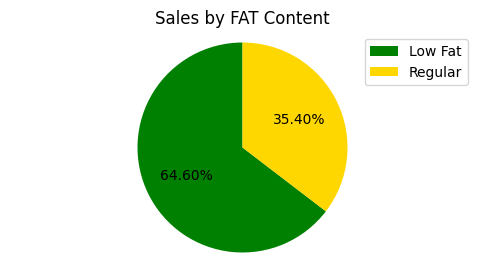

In [72]:
# make a pie chart for sales by fat content
sal_by_fat = df.groupby('Item Fat Content')['Sales'].sum().round(2)
colors = ['green','gold']
plt.figure(figsize=(6,3))
plt.pie(sal_by_fat,autopct='%.2f%%', startangle=90,colors=colors)
plt.title("Sales by FAT Content")
plt.axis('equal')
plt.legend(sal_by_fat.index,loc='upper right')
plt.show()

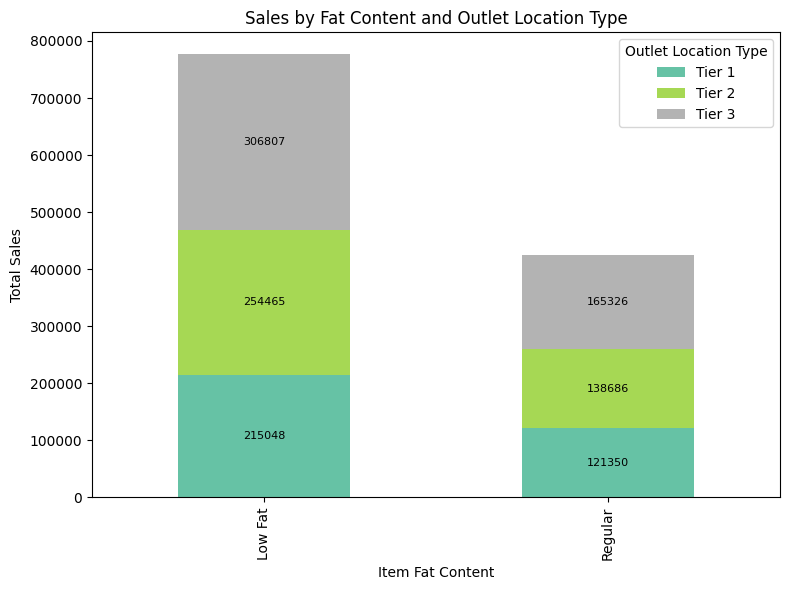

In [114]:
# Step 1: Group and pivot
fat_by_outlet = df.groupby(['Item Fat Content', 'Outlet Location Type'])['Sales'].sum().unstack()

# Step 2: Plot stacked bar chart
ax = fat_by_outlet.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

# Step 3: Titles and Labels
plt.title('Sales by Fat Content and Outlet Location Type')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.legend(title='Outlet Location Type')

# Step 4: Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.tight_layout()
plt.show()

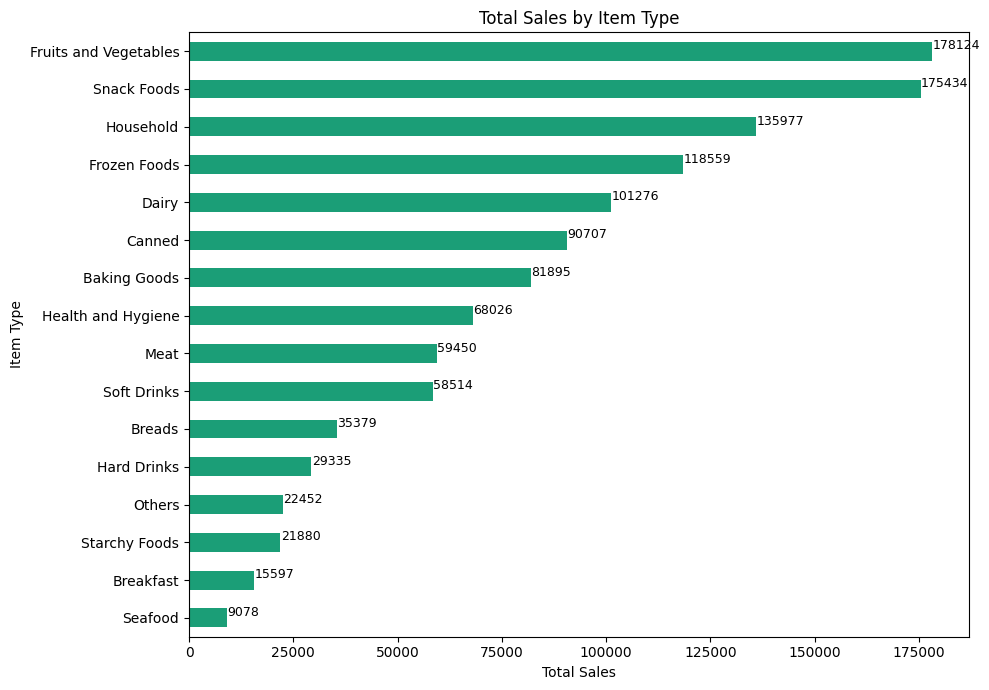

In [106]:
# find total sale by items names
# Group and sort
item_types = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=True)

# Plot
ax = item_types.plot(kind='barh', colormap='Dark2', figsize=(10, 7))

# Add titles and labels
plt.title('Total Sales by Item Type')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')

# Add data labels
for i in ax.patches:
    ax.text(i.get_width()+100, i.get_y() + 0.3, f'{i.get_width():.0f}', fontsize=9)

plt.tight_layout()
plt.show()

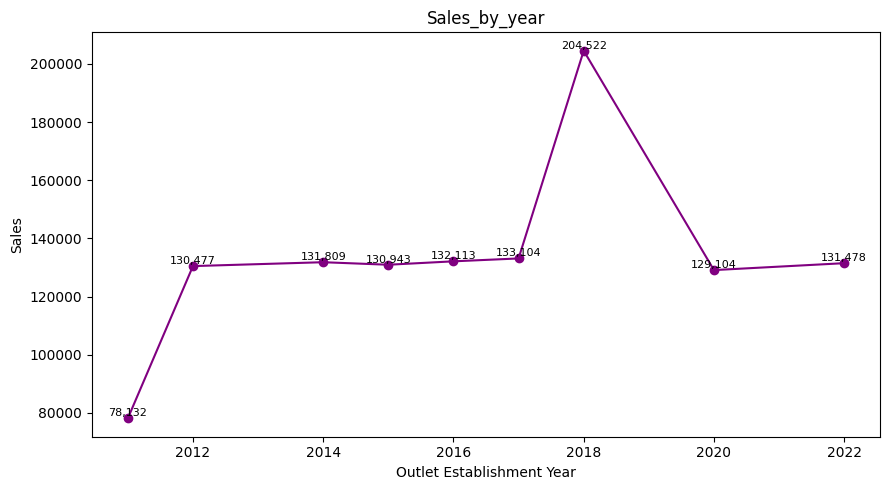

In [124]:
# total sales by Outlet Establishment Year
# group by 
Sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
# make a line chart for this  
plt.figure(figsize=(9,5))
plt.plot(Sales_by_year.index, Sales_by_year.values, marker='o', linestyle='-',color='purple')
plt.xlabel('Outlet Establishment Year')
plt.ylabel("Sales")
plt.title('Sales_by_year')
for x,y in zip(Sales_by_year.index,Sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

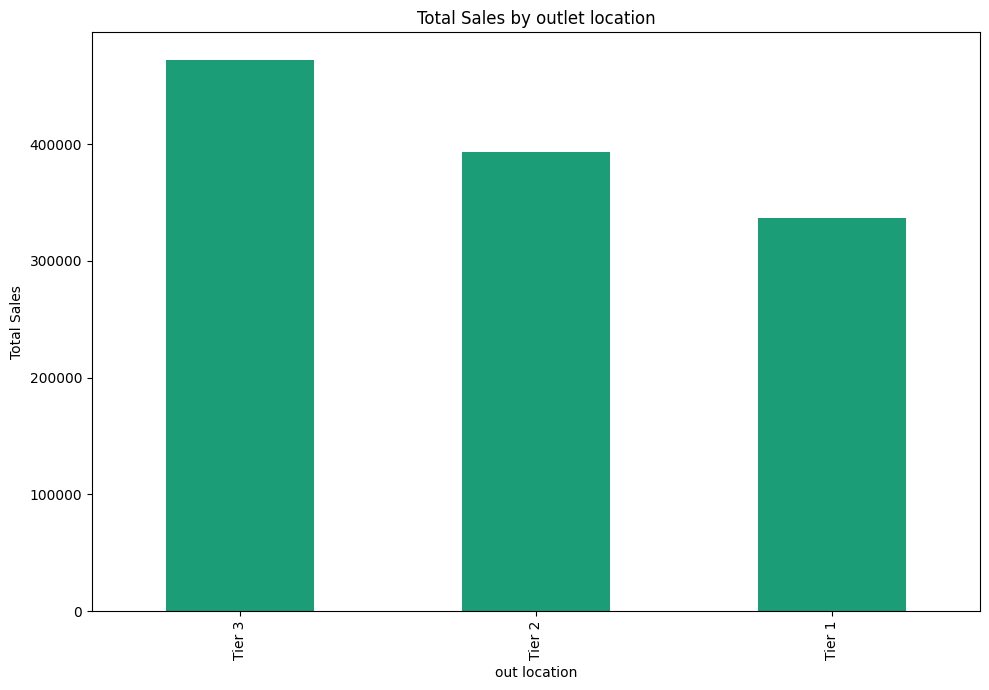

In [130]:
# total sales byOutlet Location Type
# group by 
sales_by_location = df.groupby(['Outlet Location Type'])['Sales'].sum().sort_values(ascending=False)
# make a chart for this
ax=sales_by_location.plot(kind='bar',colormap='Dark2', figsize=(10, 7))
# Add titles and labels
plt.title('Total Sales by outlet location')
plt.xlabel('out location')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [133]:
# find total sales by Outlet Size  
# group by
outlet_size_by_sales = df.groupby('Outlet Size')['Sales'].sum().round(2)

# make a pie chart for this  
plt.figure(figsize=(6,3))
plt.pie(outlet_size_by_sales='%.2f%%', startangle=90)
plt.title("Sales by outlet size")
plt.axis('equal')
plt.legend(outlet_size_by_sales.index,loc='upper right')
plt.show()

TypeError: pie() got an unexpected keyword argument 'outlet_size_by_sales'

<Figure size 600x300 with 0 Axes>

In [83]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')